In [1]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv("Champagne_Sales.csv") #, parse_dates=["Day"])
#tunnel = pd.read_csv("data/SimulatedSales.csv.zip")
df = df.rename(columns={'Champagne sales': 'Sales'})
# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
df = df.set_index("Month")

In [33]:
#tunnel = tunnel.to_period()
df.head()

,Sales
Month,
1964-01,2815
1964-02,2672
1964-03,2755
1964-04,2721
1964-05,2946


In [34]:
df = df.copy()

df['Time'] = np.arange(len(df.index))

df.head()

,Sales,Time
Month,,
1964-01,2815,0
1964-02,2672,1
1964-03,2755,2
1964-04,2721,3
1964-05,2946,4


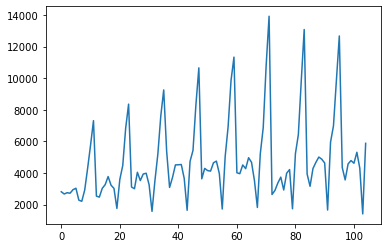

In [25]:
pl.plot(df.values[:,0])

In [35]:
train = df[:85]
test = df[-20:]

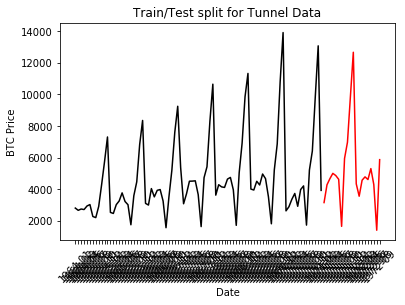

In [101]:
pl.plot(train.index,train.values[:,0], color = "black")
pl.plot(test.index,test.values[:,0], color = "red")
pl.ylabel('BTC Price')
pl.xlabel('Date')
pl.xticks(rotation=45)
pl.title("Train/Test split for Tunnel Data")
pl.show()

In [39]:
from sklearn.linear_model import LinearRegression

# Training data
X = train.loc[:, ['Time']]  # features
y = train.loc[:, ['Sales']]  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [60]:
model.predict(X).reshape(X.shape[0]).shape

(85,)

In [61]:
# Store the fitted values as a time series with the same time index as
# the training data

y_pred = model.predict(X) #pd.Series(model.predict(X).reshape(X.shape[0],1), index=X.index)


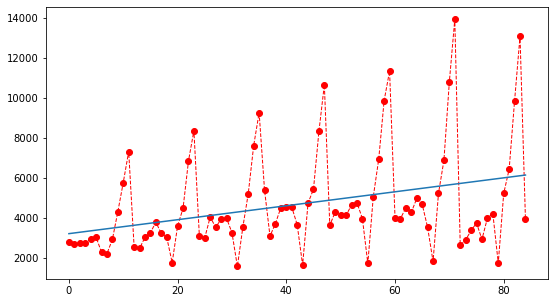

In [63]:
pl.figure(figsize=(9,5))

pl.plot(X.values,y,'r--o',lw=1)
pl.plot(X.values,y_pred)
#pl.xlim(100,200)

### Insert Time Lag 

In [67]:
train['Lag_1'] = train['Sales'].shift(1)
train.head()

,Sales,Time,Lag_1
Month,,,
1964-01,2815,0,NaN
1964-02,2672,1,2815.0
1964-03,2755,2,2672.0
1964-04,2721,3,2755.0
1964-05,2946,4,2721.0


In [68]:
test['Lag_1'] = test['Sales'].shift(1)
train.head()

,Sales,Time,Lag_1
Month,,,
1964-01,2815,0,NaN
1964-02,2672,1,2815.0
1964-03,2755,2,2672.0
1964-04,2721,3,2755.0
1964-05,2946,4,2721.0


In [69]:
from sklearn.linear_model import LinearRegression

X = train.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = train.loc[:, 'Sales']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred_ = pd.Series(model.predict(X), index=X.index)

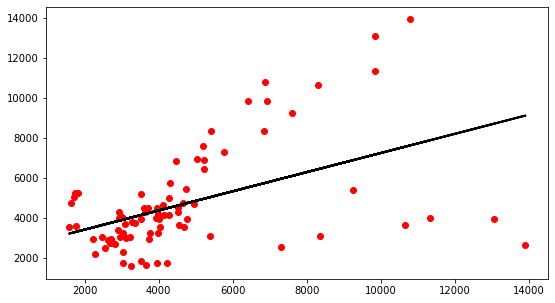

In [70]:
pl.figure(figsize=(9,5))

pl.plot(X.values,y.values,"ro")
pl.plot(X.values,y_pred_,"k-",lw=2)

In [71]:
#predict test values

X_test = test.loc[:, ['Lag_1']]
X_test.dropna(inplace=True)  # drop missing values in the feature set
y_test = test.loc[:, 'Sales']  # create the target
y_test, X_test = y_test.align(X_test, join='inner')  # drop corresponding values in target

In [72]:
y_pred_test = pd.Series(model.predict(X_test), index=X_test.index)

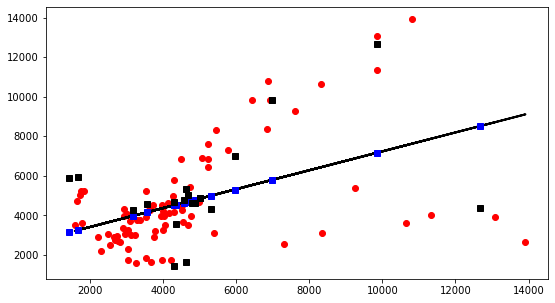

In [73]:
pl.figure(figsize=(9,5))

pl.plot(X.values,y.values,"ro")
pl.plot(X.values,y_pred_,"k-",lw=2)
pl.plot(X_test.values,y_pred_test,"bs")
pl.plot(X_test.values,y_test,"ks")

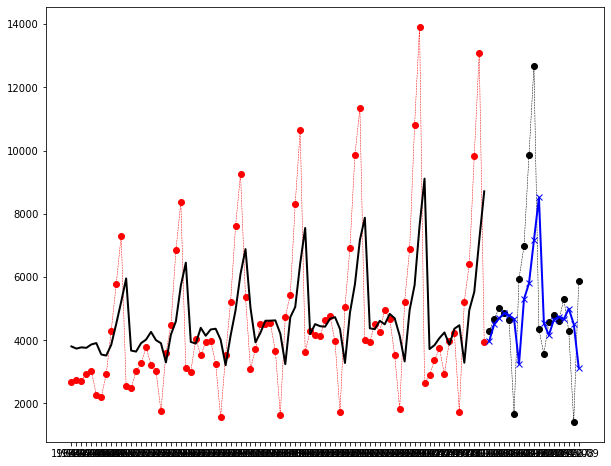

In [102]:
pl.figure(figsize=(10,8))

pl.plot(y,"r--o",lw=0.5)
pl.plot(y_pred_,"k-",lw=2)
pl.plot(y_test,"k--o",lw=0.5)
pl.plot(y_pred_test,"b-x",lw=2)

In [77]:
#compute accuracy on the train and test set

acc_train = np.linalg.norm(y_pred_-y)/y.values.shape[0]
acc_test = np.linalg.norm(y_pred_test-y_test)/y_test.values.shape[0]

print(acc_train)
print(acc_test)

245.49453322703852
533.4496659080638


In [78]:
#predict values in the future 

X_test.iloc[-1].values.reshape(1,1)

array([[1413.]])

In [79]:
model.predict(X_test.iloc[-1].values.reshape(1,1))

array([3133.70982851])

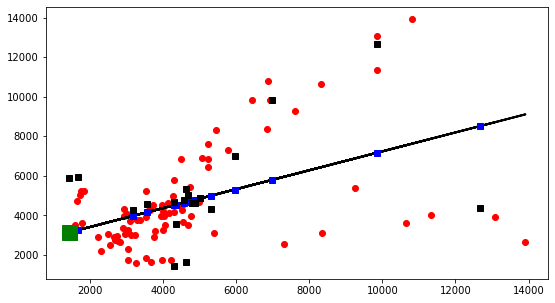

In [80]:
pl.figure(figsize=(9,5))

pl.plot(X.values,y.values,"ro")
pl.plot(X.values,y_pred_,"k-",lw=2)
pl.plot(X_test.values,y_pred_test,"bs")
pl.plot(X_test.values,y_test,"ks")

pl.plot(X_test.iloc[-1].values.reshape(1,1),model.predict(X_test.iloc[-1].values.reshape(1,1)),"gs",ms=15)

In [98]:
prediction_time_span = 5

pred = []
t0 = X_test.iloc[-1].values.reshape(1,1)

for i in range(prediction_time_span):
    
    prediction = model.predict(t0)
    pred.append(prediction)
    t0 = prediction.reshape(1,1)
    

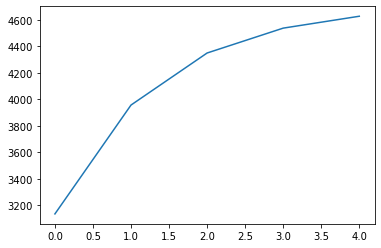

In [99]:
pl.plot(pred)

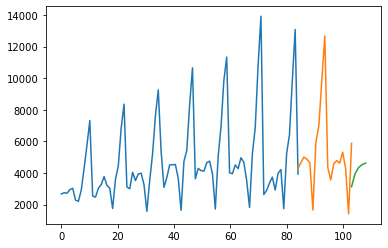

In [100]:
#unisci train-test e predicton

x_train = np.linspace(0,y.values.size,y.values.size)
x_test = np.linspace(y.values.size,y.values.size+y_test.values.size,y_test.values.size)

x_pred = np.linspace(y.values.size+y_test.values.size,
                     y.values.size+y_test.values.size+prediction_time_span,prediction_time_span)

pl.plot(x_train,y.values)
pl.plot(x_test,y_test.values)
pl.plot(x_pred,pred)